# Imports iniciais

In [1]:
! pip install pandas nltk transformers[torch] torch matplotlib seaborn wordcloud scikit-learn evaluate datasets

In [4]:
import pandas as pd
import random
import nltk # pip3 install nltk
from LSTM import *
from transformers_finetune import *
from common import *

random.seed(42)
nltk.download('punkt')
nltk.download('stopwords')

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
PATH_DATASET_NER = "../datasets/NER_dataset.json"

In [6]:
df = pd.read_json(PATH_DATASET_NER)
df.head()

,annotations
0,"[[De, jeito, nenhum.], [ENTITY_PREFERENCE, ENT..."
1,"[[Super-herói, de, ficção, científica], [ENTIT..."
2,"[[Eu, gosto], [ENTITY_PREFERENCE, ENTITY_PREFE..."
3,"[[Bem,, como, eu, disse, eu, eu, gosto, princi..."
4,"[[Sim,, absolutamente.], [ENTITY_PREFERENCE, E..."


In [7]:
ner_df = df["annotations"]

# Analisando o dataset

In [6]:
text_entries = []

for element in df.annotations:
    text_entries.append(element[0])

len(text_entries), text_entries[:10]

(104,
 [['De', 'jeito', 'nenhum.'],
  ['Super-herói', 'de', 'ficção', 'científica'],
  ['Eu', 'gosto'],
  ['Bem,',
   'como',
   'eu',
   'disse',
   'eu',
   'eu',
   'gosto',
   'principalmente',
   'de',
   'comédias',
   'porque',
   'tira',
   'minha',
   'mente',
   'das',
   'coisas',
   'do',
   'dia',
   'a',
   'dia',
   'e',
   'eu',
   'gosto',
   'dos',
   'documentários'],
  ['Sim,', 'absolutamente.'],
  ['filmes', 'de', 'comédia'],
  ['Eu',
   'realmente',
   'gosto',
   'de',
   'comédias',
   'e',
   'filmes',
   'de',
   'ficção',
   'científica'],
  ['claro', 'com', 'a', 'primeira', 'vez', 'que', 'Homem', 'de', 'Ferro'],
  ['Filmes',
   'como',
   'filmes',
   'de',
   'Adam',
   'Sandler',
   'ou',
   'filmes',
   'de',
   'Jim',
   'Carrey'],
  ['Eu',
   'gosto',
   'da',
   'história',
   'de',
   'uma',
   'família',
   'de',
   'super-heróis',
   'tentando',
   'levar',
   'uma',
   'vida',
   'normal',
   ',',
   'e',
   'eu',
   'gosto',
   'da',
   'animação.

In [7]:
conc_text = "\n".join([" ".join(entries) for entries in text_entries]).lower()
conc_text[:10]

'de jeito n'

In [8]:
tokenized_words = nltk.tokenize.word_tokenize(remove_punctuation(conc_text), language="portuguese")
tokenized_words[:10]

['de',
 'jeito',
 'nenhum',
 'superherói',
 'de',
 'ficção',
 'científica',
 'eu',
 'gosto',
 'bem']

In [9]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
stopwords_pt[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

## Tamanho do vocabulário

In [10]:
print(f"O tamanho do vocabulário é {len(set(tokenized_words))}")

O tamanho do vocabulário é 443


## Tamanho das Sentenças

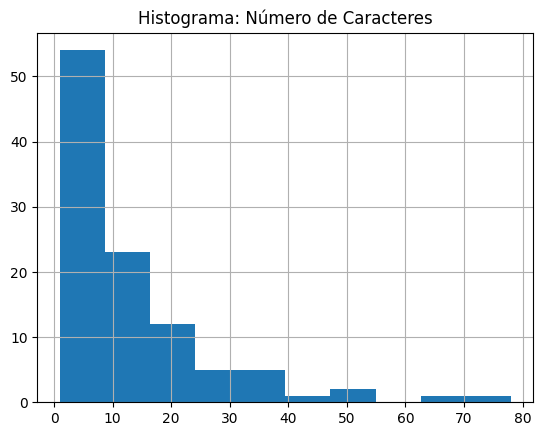

In [11]:
plot_hist([len(phrase) for phrase in text_entries], title="Histograma: Número de Caracteres")

In [12]:
plot_hist([len(nltk.tokenize.word_tokenize(remove_punctuation(phrase), language="portuguese")) for phrase in text_entries], "Histograma: Número de Tokens")

AttributeError: 'list' object has no attribute 'translate'

In [ ]:
plot_hist([len(tk) for tk in tokenized_words], "Histograma: Tamanho dos Tokens")

NameError: name 'plot_hist' is not defined

## Palavras mais comuns

In [ ]:
plot_most_frequent_word(tokenized_words, stopwords_pt)

NameError: name 'plot_most_frequent_word' is not defined

In [ ]:
cloud_of_words(conc_text, stopwords_pt)

NameError: name 'cloud_of_words' is not defined

# Separando o dataset

In [8]:
random.shuffle(ner_df)
ner_df[:3]

0    [[Eu, gosto, de, filmes, de, aventura], [ENTIT...
1    [[É, só, isso., Eu, não, sou, muito, fã, de, f...
2    [[Foi, Houve, muitos, super-heróis, e, ação, n...
Name: annotations, dtype: object

In [9]:
df_train = ner_df[:int(len(ner_df)*0.6)]
df_test = ner_df[int(len(ner_df)*0.6):int(len(ner_df)*0.8)]
df_val = ner_df[int(len(ner_df)*0.8):]

len(df_train), len(df_test), len(df_val)

(62, 21, 21)

# Treinando o Extrator

## LSTM

In [10]:
word_to_ix, tag_to_ix = one_hot_encoding_mapper(ner_df)

In [16]:
EMBEDDING_DIM = 32
HIDDEN_DIM = 16
OUTPUT_DIM = 5  # Número de tags de saída
NUM_EPOCHS = 100

In [17]:
model = train_lstm(NUM_EPOCHS, df_train, df_val, word_to_ix, tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)

Treinando LSTM no device cpu


  2%|▏         | 2/100 [00:00<00:06, 15.25it/s]

Epoch 1, Validation Loss: 1.4391574121656872
Epoch 2, Validation Loss: 1.3276747947647458
Epoch 3, Validation Loss: 1.2615800812130882


  4%|▍         | 4/100 [00:00<00:05, 17.01it/s]

Epoch 4, Validation Loss: 1.2151458462079365
Epoch 5, Validation Loss: 1.1839693131900968


  6%|▌         | 6/100 [00:00<00:05, 18.25it/s]

Epoch 6, Validation Loss: 1.1690844779922849
Epoch 7, Validation Loss: 1.1690947441827684


  8%|▊         | 8/100 [00:00<00:04, 18.62it/s]

Epoch 8, Validation Loss: 1.1802806173052107
Epoch 9, Validation Loss: 1.2008491470700218


 10%|█         | 10/100 [00:00<00:05, 16.65it/s]

Epoch 10, Validation Loss: 1.232724966037841
Epoch 11, Validation Loss: 1.273422964272045
Early stopping!


In [18]:
test_LSTM(model, word_to_ix, tag_to_ix, df_test)

Test Accuracy: 0.58984375


## Transformers

In [11]:
tag_to_ix.keys()

dict_keys(['ENTITY_PREFERENCE', 'O', 'ENTITY_DESCRIPTION', 'ENTITY_OTHER', 'ENTITY_NAME', 'ENTITY_ACTOR'])

In [12]:
df_train_pd = pd.DataFrame.from_dict({"tokens":[entry[0] for entry in df_train], "label":[[tag_to_ix[lb] for lb in entry[1]] for entry in df_train]})
df_test_pd = pd.DataFrame.from_dict({"tokens":[entry[0] for entry in df_test], "label":[[tag_to_ix[lb] for lb in entry[1]] for entry in df_test]})
df_val_pd = pd.DataFrame.from_dict({"tokens":[entry[0] for entry in df_val], "label":[[tag_to_ix[lb] for lb in entry[1]] for entry in df_val]})

In [13]:
df_test_pd.head()

,tokens,label
0,"[Eu, realmente, gosto, de, comédias, e, filmes...","[0, 0, 0, 1, 2, 1, 2, 2, 2, 2]"
1,"[Deixe-me, pensar, por, um, momento., Tem, ess...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4]"
2,"[Eu, sou, fã, de, filmes, de, aventura]","[0, 0, 0, 2, 2, 2, 2]"
3,"[Eu, sou, fã, de, filmes, de, ação, cheios, de...","[0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2]"
4,"[Sexta-feira, 13, é, um, filme, de, terror., É...","[4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."


In [14]:
trainer = TrainTransformers(df_train_pd, df_test_pd, df_val_pd, list(tag_to_ix.keys()))

In [21]:
import evaluate
import numpy as np
from pandas import DataFrame
from transformers import AutoModelForTokenClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorForTokenClassification
from datasets import Dataset, DatasetDict
from sklearn.metrics import accuracy_score, f1_score, classification_report
# https://huggingface.co/learn/nlp-course/chapter7/2?fw=pt

MODEL = "microsoft/xtremedistil-l6-h256-uncased"

class TrainTransformers():
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    model = AutoModelForTokenClassification.from_pretrained(MODEL)
    data_collator = DataCollatorForTokenClassification(tokenizer)
    
    def __init__(self, train_df:DataFrame, test_df:DataFrame, val_df:DataFrame, label_list:list) -> None:
        self.train_df = Dataset.from_pandas(train_df)
        self.test_df = Dataset.from_pandas(test_df)
        self.val_df = Dataset.from_pandas(val_df)
        self.label_list = label_list
    
    def tokenize_and_align_labels(self, examples):
        tokenized_inputs = self.tokenizer(examples["tokens"], truncation=True, is_split_into_words=True, max_length=128, padding=True)

        labels = []
        for i, label in enumerate(examples["label"]):
            word_ids = tokenized_inputs.word_ids(batch_index=i)
            previous_word_idx = None
            label_ids = []
            for word_idx in word_ids:
                if word_idx is None:
                    label_ids.append(-100)
                elif word_idx != previous_word_idx:
                    label_ids.append(label[word_idx])
                else:
                    label_ids.append(label[word_idx])
                previous_word_idx = word_idx

            labels.append(label_ids)

        tokenized_inputs["labels"] = labels
        return tokenized_inputs


    def train(self, model_name:str, lr:float=0.001, num_epochs:int=10, batch_size:int=500):
        train_data = self.train_df.map(self.tokenize_and_align_labels, batched=True)
        val_data = self.val_df.map(self.tokenize_and_align_labels, batched=True)
        
        training_args = TrainingArguments(
            output_dir=model_name,
            do_eval=True,
            lr_scheduler_type="linear",
            no_cuda=False,
            learning_rate=lr,
            per_device_train_batch_size=batch_size,
            per_device_eval_batch_size=batch_size,
            num_train_epochs=3,
            evaluation_strategy="epoch"
        )
    
        
        def compute_metrics(p):
            predictions, labels = p
            predictions = np.argmax(predictions, axis=2)
            
            # Remove ignored index (special tokens)
            true_predictions = [
                [self.label_list[p] for (p, l) in zip(prediction, label) if l != -100]
                for prediction, label in zip(predictions, labels)
            ]
            true_labels = [
                [self.label_list[l] for (p, l) in zip(prediction, label) if l != -100]
                for prediction, label in zip(predictions, labels)
            ]
            results = {
                'accuracy': accuracy_score(true_labels, true_predictions),
                'f1': f1_score(true_labels, true_predictions),
                'classification_report': classification_report(true_labels, true_predictions)
            }
            return results
        
        trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=train_data,
            eval_dataset=val_data,
            tokenizer=self.tokenizer, 
            data_collator=self.data_collator,
            compute_metrics=compute_metrics,
        )
        
        trainer.train()

OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like Luciano/bertimbau-base-lener_br is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [17]:
trainer = TrainTransformers(df_train_pd, df_test_pd, df_val_pd, list(tag_to_ix.keys()))

In [18]:
trainer.train("ner_cinema_bert")

Map: 100%|██████████| 21/21 [00:00<00:00, 4196.10 examples/s]


TypeError: BertForTokenClassification.forward() got an unexpected keyword argument 'label'